# Introduction to plotly

Some of you may have used plotly in previous courses.

The plotly website is available at https://plot.ly/

The first step is for you to log into the plotly website and set up an account.

Then, install the plotly package in python by running the following cell (note that if you already have plotly installed, you'll want to change "install" to "upgrade"):

In [ ]:
!conda -y install plotly

To complete your setup, follow the steps after "Installation" at https://plot.ly/python/getting-started/

Note, in particular, the steps around setting up your API Key and creating local credentials on your machine.

# Q1: Record your plotly username (but NOT your API Key)


your username here

Let's start by loading some sample data:

In [41]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")

In [42]:
df.head()

,School,Women,Men,Gap
0,MIT,94,152,58
1,Stanford,96,151,55
2,Harvard,112,165,53
3,U.Penn,92,141,49
4,Princeton,90,137,47


# Q2: Create some basic descriptive stats and visualizations using this dataset

In [43]:
# your code and results go here

# END Q2

Now let's get going with plotly.  Working with the same small dataset, we can generate a prettier table using plotly:

In [46]:
import plotly.plotly as py
import plotly.figure_factory as ff


table = ff.create_table(df)
py.iplot(table, filename='jupyter-table1')

Now let's look at a potentially more useful chart:  let's see a ranked plot of the income gaps from these colleges.  It's pretty easy using plotly:

In [47]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(x=df.School,
            y=df.Gap)]

py.iplot(data, filename='jupyter-basic_bar')

That's great, but it's not a lot different from what we can do using seaborn (how would you do that in seaborn?).  One of the things that plotly is particularly good at is plotting data on maps.  Let's load another data set, this one showing data on nuclear waste sites on American campuses:

In [58]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/Nuclear%20Waste%20Sites%20on%20American%20Campuses.csv')
site_lat = df.lat
site_lon = df.lon
location_names = list(df.text)

In [60]:
df.head()

,lat,lon,text
0,35.888827,-106.305022,Acid/Pueblo Canyon
1,39.503487,-84.743859,Alba Craft Shop
2,44.620822,-123.120917,"""Albany, Oregon, FUSRAP Site"""
3,40.641371,-80.242936,Aliquippa Forge
4,39.361063,-84.540750,Associated Aircraft Tool and Manufacturing Co.


In [61]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=17,
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
        text=location_names,
        hoverinfo='text'
    ),
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=8,
            color='rgb(242, 177, 172)',
            opacity=0.7
        ),
        hoverinfo='none'
    )]


layout = go.Layout(
    title='Nuclear Waste Sites on Campus',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        bearing=0,
        center=dict(
            lat=38,
            lon=-94
        ),
        pitch=0,
        zoom=3,
        style='light'
    ),
)

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='jupyter-Nuclear Waste Sites on American Campuses')

Not bad, but let's modify the above code to show the site name when you hover over it.

Change ```hoverinfo='none',``` to 
```
text=location_names,
hoverinfo='text',
```

# Q3: Add hover text

Change ```hoverinfo='none',``` to 
```
text=location_names,
hoverinfo='text',
``` 
and show the new map below.

# END Q3

# Mapping World Development Indicators

Now that we've got some mapping basics under our belts, let's turn to an even more interesting dataset:  the World Bank's World Development
Indicators.

Why is it more interesting?  Just ask Hans Rosling

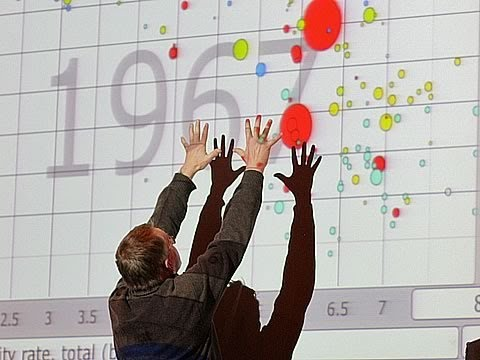

In [62]:
from IPython.display import YouTubeVideo
# Hans Rosling's "The Best Stats You've Ever Seen"
YouTubeVideo('hVimVzgtD6w')

We're not going to get quite that fancy, but let's start exploring some World Development Indicators visually.
We're going to focus on non-animated maps, at least for now.

First, read the data (from https://www.kaggle.com/worldbank/world-development-indicators):

In [77]:
indicators = pd.read_csv("Indicators.csv")

As usual, generate some descriptive statistics about the data

In [71]:
indicators.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


There are a lot of different indicators available:

In [72]:
print(list(indicators.IndicatorName.unique()))

['Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Age dependency ratio (% of working-age population)', 'Age dependency ratio, old (% of working-age population)', 'Age dependency ratio, young (% of working-age population)', 'Arms exports (SIPRI trend indicator values)', 'Arms imports (SIPRI trend indicator values)', 'Birth rate, crude (per 1,000 people)', 'CO2 emissions (kt)', 'CO2 emissions (metric tons per capita)', 'CO2 emissions from gaseous fuel consumption (% of total)', 'CO2 emissions from liquid fuel consumption (% of total)', 'CO2 emissions from liquid fuel consumption (kt)', 'CO2 emissions from solid fuel consumption (% of total)', 'Death rate, crude (per 1,000 people)', 'Fertility rate, total (births per woman)', 'Fixed telephone subscriptions', 'Fixed telephone subscriptions (per 100 people)', 'Hospital beds (per 1,000 people)', 'International migrant stock (% of population)', 'International migrant stock, total', 'Life expectancy at birth, female (years)', 

There's lots of indicators to choose from, but let's filter our dataset down to something more reasonable:

In [73]:
indicatorName = "Life expectancy at birth, total (years)"
indicatorYear = 2013

filtered = indicators[(indicators.IndicatorName==indicatorName) & (indicators.Year==indicatorYear)]

In [74]:
filtered.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5377671,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2013,70.631305
5378131,Caribbean small states,CSS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2013,71.901964
5378638,Central Europe and the Baltics,CEB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2013,76.127583
5379153,East Asia & Pacific (all income levels),EAS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2013,74.604619
5379761,East Asia & Pacific (developing only),EAP,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2013,73.657617


Not surprisingly, the data needs some cleanup:

In [75]:
correction = {"Antigua and Barbuda":"Antigua", "Bahamas, The":"Bahamas", "Brunei Darussalam":"Brunei",
"Cabo Verde":"Cape Verde", "Congo, Dem. Rep.":"Democratic Republic of the Congo", "Congo, Rep.":"Republic of Congo", 
"Cote d'Ivoire":"Ivory Coast", "Egypt, Arab Rep.":"Egypt", "Faeroe Islands":"Faroe Islands", "Gambia, The":"Gambia", 
"Iran, Islamic Rep.":"Iran", "Korea, Dem. Rep.":"North Korea", "Korea, Rep.":"South Korea", "Kyrgyz Republic":"Kyrgyzstan",
"Lao PDR":"Laos", "Macedonia, FYR":"Macedonia", "Micronesia, Fed. Sts.":"Micronesia", "Russian Federation":"Russia",
"Slovak Republic":"Slovakia", "St. Lucia":"Saint Lucia", "St. Martin (French part)":"Saint Martin", 
"St. Vincent and the Grenadines":"Saint Vincent", "Syrian Arab Republic":"Syria", "Trinidad and Tobago":"Trinidad", 
"United Kingdom":"UK", "United States":"USA", "Venezuela, RB":"Venezuela", "Virgin Islands (U.S.)":"Virgin Islands", 
"Yemen, Rep.":"Yemen"}

filtered.replace(correction, inplace=True)

And finally, let's generate a map of our filtered data:

In [76]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = filtered.CountryCode.values,
        z = filtered.Value.values,
        text = filtered.CountryName,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Count")
        ) ]

layout = dict(
        title = '{} in {}'.format(filtered.IndicatorName.unique()[0],filtered.Year.unique()[0]),
        geo = dict(
            scope='world',
            projection=dict( type='natural earth' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-choropleth-map' )

# Q4: Your turn!
Go ahead and refilter your data and regenerate the map.  You might look at another indicator, or perhaps the same indicator but a different year.
You might also want to change the map projection to be something different.  If you're done, generate one or two more.  We'll share our work
at the end of today's class.

In [ ]:
Insert your code here